In [1]:
%load_ext autoreload
%autoreload 2

In [27]:
import os
import random
import matplotlib.pyplot as plt
from dataset import *

def image_preview(directory, title):
    img_paths = load_full_subdir(directory)
    random.shuffle(img_paths)
    img_paths = img_paths[:8]
    fig, axes = plt.subplots(nrows=1, ncols=8)
    fig.suptitle(title, y=0.33)
    for i, path in enumerate(img_paths):
        axes[i].axis('off')
        img = img_to_show(np.load(path))
        axes[i].imshow(img)

**import the collective datasets (including both the given annotated set and the sets we created)**

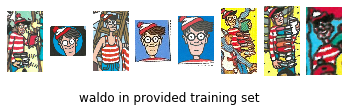

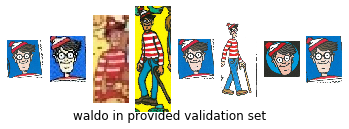

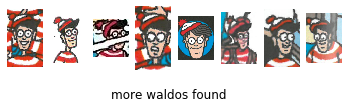

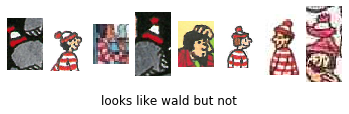

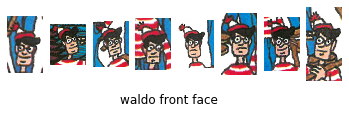

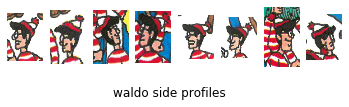

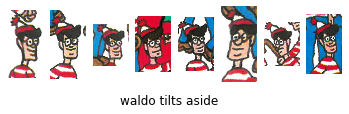

In [28]:
prepare_dataset()
goal_dir = os.path.join(os.getcwd(), 'datasets')
train_waldo_dir = os.path.join(goal_dir, 'train', 'positives', 'waldo')
val_waldo_dir = os.path.join(goal_dir, 'val', 'positives', 'waldo')
extra_waldo_dir = os.path.join(goal_dir, 'extra', 'positives', 'waldo')
confusion_waldo_dir = os.path.join(goal_dir, 'extra', 'positives', 'waldo')
confusion_waldo_dir = os.path.join(goal_dir, 'extra', 'confusion', 'waldo_wenda')
front_waldo_dir = os.path.join(goal_dir, 'waldo_extra', 'front')
side_waldo_dir = os.path.join(goal_dir, 'waldo_extra', 'side')
tilt_waldo_dir = os.path.join(goal_dir, 'waldo_extra', 'tilt')

image_preview(train_waldo_dir, 'waldo in provided training set')
image_preview(val_waldo_dir, 'waldo in provided validation set')
image_preview(extra_waldo_dir, 'more waldos found')
image_preview(confusion_waldo_dir, 'looks like wald but not')
image_preview(front_waldo_dir, 'waldo front face')
image_preview(side_waldo_dir, 'waldo side profiles')
image_preview(tilt_waldo_dir, 'waldo tilts aside')

**Basically use SIFT to extract images features. Get a classifier.**

In [44]:
from classification import *

classifier = trainer('waldo', method='sift', vocab_overwrite=True)

--- fetching the vocbulary
--- vocabulary stored in /Users/yangsihan/PycharmProjects/Waldo/sift_dict/waldo.npy
--- extracting features from the positive training set
--- extracting features from the negative training set
--- SVM starts working
--- extracting features from the positive validation set
--- extracting features from the negative validation set
--- predicting the validation set labels
--- precision: 0.617, recall: 0.949, f1-score: 0.747


**Visualze the performance of the classifier**

In [57]:
def sample_loader(directory):
    img_paths = load_full_subdir(directory)
    random.shuffle(img_paths)
    img_paths = img_paths[:8]
    return list(map(lambda x: np.load(x), img_paths))

def view_prediction(directory, clf, vocabs, title):
    samples = sample_loader(directory)
    feats = load_feats(samples, vocabs, method='sift')
    predictions = clf.predict(feats)
    fig, axes = plt.subplots(nrows=1, ncols=8)
    fig.suptitle(title, y=0.8)
    for i, sample in enumerate(samples):
        axes[i].axis('off')
        img = img_to_show(sample)
        res = 'yes' if predictions[i]==1.0 else 'no'
        axes[i].imshow(img)
        axes[i].set_title(res)

--- fetching the vocbulary
--- vocabulary stored in /Users/yangsihan/PycharmProjects/Waldo/sift_dict/waldo.npy


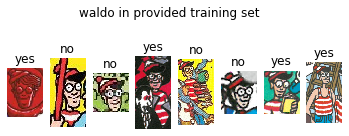

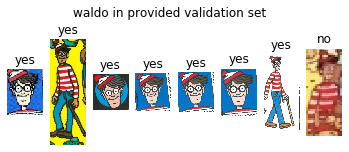

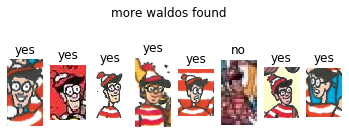

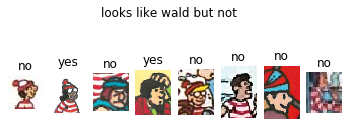

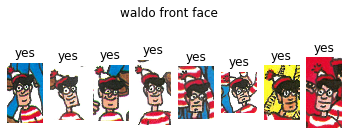

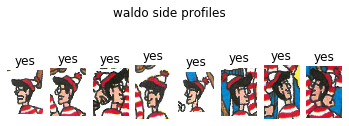

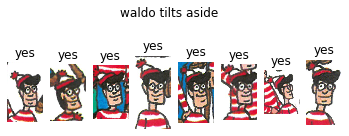

In [58]:
vocabs = fetch_feat_dict('waldo', method='sift')

view_prediction(train_waldo_dir, classifier, vocabs, 'waldo in provided training set')
view_prediction(val_waldo_dir, classifier, vocabs, 'waldo in provided validation set')
view_prediction(extra_waldo_dir, classifier, vocabs, 'more waldos found')
view_prediction(confusion_waldo_dir, classifier, vocabs, 'looks like wald but not')
view_prediction(front_waldo_dir, classifier, vocabs, 'waldo front face')
view_prediction(side_waldo_dir, classifier, vocabs, 'waldo side profiles')
view_prediction(tilt_waldo_dir, classifier, vocabs, 'waldo tilts aside')